In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sa2025dataset/hacktest.csv
/kaggle/input/sa2025dataset/hacktrain.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [46]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/sa2025dataset/hacktrain.csv')
test_df = pd.read_csv('/kaggle/input/sa2025dataset/hacktest.csv')

# To check if it loaded correctly:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [47]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
train_df = pd.read_csv('/kaggle/input/sa2025dataset/hacktrain.csv')
test_df = pd.read_csv('/kaggle/input/sa2025dataset/hacktest.csv')

In [49]:
label_encoder = LabelEncoder()
train_df['class'] = label_encoder.fit_transform(train_df['class'])

X = train_df.drop(['ID', 'class'], axis=1)
y = train_df['class']

# Fill missing values
X = X.fillna(X.mean())

# Step 3: Train/Test Split and Model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
from sklearn.metrics import classification_report

#Predict on validation set
y_pred = model.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred, target_names=[str(c) for c in label_encoder.classes_]))

              precision    recall  f1-score   support

        farm       0.84      0.97      0.90       161
      forest       1.00      1.00      1.00      1231
       grass       0.93      0.88      0.90        43
  impervious       0.94      0.82      0.88       141
     orchard       1.00      0.17      0.29         6
       water       1.00      1.00      1.00        18

    accuracy                           0.97      1600
   macro avg       0.95      0.81      0.83      1600
weighted avg       0.98      0.97      0.97      1600



<Figure size 1000x700 with 0 Axes>

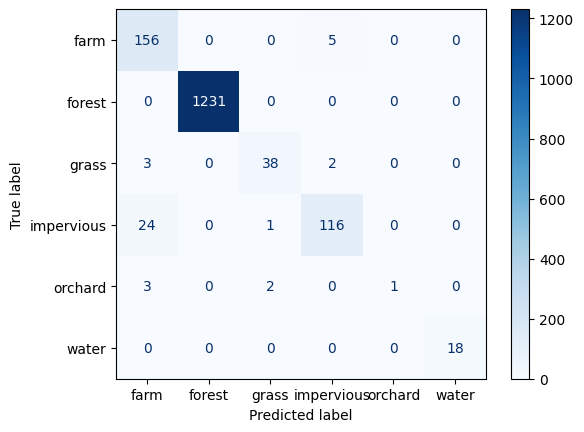

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define target names from label encoder
target_names = [str(c) for c in label_encoder.classes_]

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues')

In [52]:
# Drop unnecessary columns (adjust if needed)
X_test = test_df.drop(['ID'], axis=1)

# Predict
test_preds = model.predict(X_test)

# Decode class labels (if you encoded them)
test_preds_labels = label_encoder.inverse_transform(test_preds)

In [53]:
#Check validation matrix
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=target_names))

Accuracy: 0.975
              precision    recall  f1-score   support

        farm       0.84      0.97      0.90       161
      forest       1.00      1.00      1.00      1231
       grass       0.93      0.88      0.90        43
  impervious       0.94      0.82      0.88       141
     orchard       1.00      0.17      0.29         6
       water       1.00      1.00      1.00        18

    accuracy                           0.97      1600
   macro avg       0.95      0.81      0.83      1600
weighted avg       0.98      0.97      0.97      1600



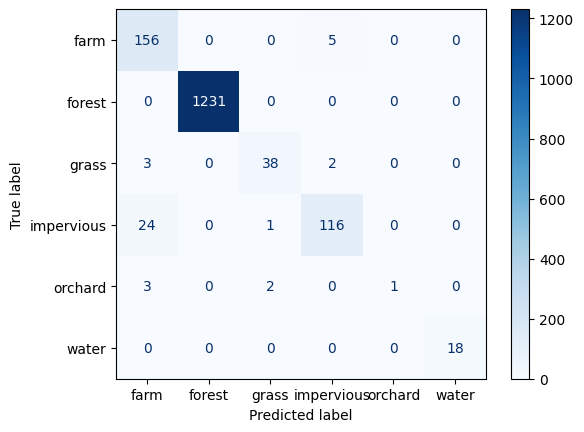

In [54]:
#Visualise confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=target_names, cmap='Blues')

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [56]:
#Hyperparameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


<Axes: >

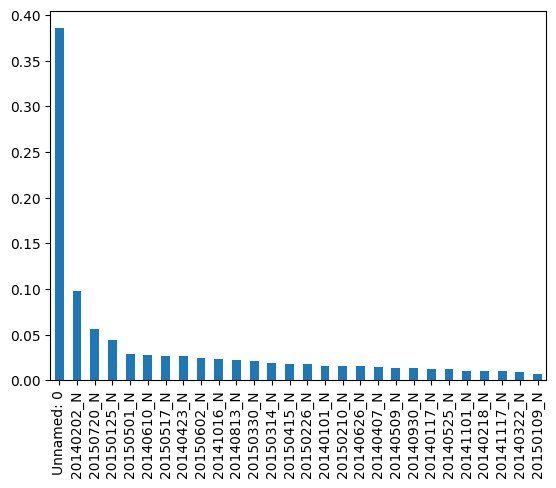

In [57]:
#Feature engineering
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar')

In [58]:
#Handle class
import numpy as np
np.bincount(y_train)

array([ 680, 4928,  153,  528,   24,   87])

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
#Cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.96796875 0.9796875  0.97578125 0.98046875 0.96796875]
Mean accuracy: 0.974375


In [61]:
#Stacking 
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
]

meta_model = LogisticRegression()

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_val)

In [62]:
#Use XG boost
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [63]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='dart')

In [64]:
#Analysing errors 
wrong = X_val[y_val != y_pred]
print(wrong.head())

      Unnamed: 0   20150720_N   20150602_N  20150517_N  20150501_N  \
7020        8833  5845.476916  5924.970000     4884.09    4177.550   
6800        8451  5845.476916  4868.091395     5903.14    6223.170   
7544        9712  5845.476916  1085.820000      307.94    1168.330   
7409        9481  5845.476916  4928.790000     4839.53    4852.220   
7636        9875  5845.476916  1671.670000     1237.78     642.654   

      20150415_N  20150330_N   20150314_N   20150226_N  20150210_N  ...  \
7020    4357.920    4208.640  3313.881373  2870.120000    3433.940  ...   
6800    2415.460    4143.430  3917.720000  4987.520158    7073.520  ...   
7544    1039.240     985.557  1163.910000   892.518000    2270.400  ...   
7409    4720.200    4461.240  4243.750000  4266.990000    4613.360  ...   
7636     782.881     763.244  1349.780000  1215.490000     635.876  ...   

      20140610_N  20140525_N  20140509_N   20140423_N  20140407_N  \
7020      530.22     4797.98     3934.24  3193.800000    12

In [65]:
#Feature selection 
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [66]:
from catboost import CatBoostClassifier

# Initialize the model
cat = CatBoostClassifier(verbose=0, random_state=42)

# Fit the model (replace X_train and y_train as per your code)
cat.fit(X_train, y_train)

# Get prediction probabilities for ensembling
cat_probs = cat.predict_proba(X_test)

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Initialize base models
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)

In [68]:
#voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('cat', cat)
    ],
    voting='soft'  # use 'hard' if you want majority voting
)

In [69]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_pol...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7fef3bb2cd50>)],
                 voting='soft')

In [70]:
voting_probs = voting_clf.predict_proba(X_test)
final_preds = np.argmax(voting_probs, axis=1)

# Decode if using label encoder
final_preds_labels = label_encoder.inverse_transform(final_preds)

In [71]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'class': test_preds_labels
})

# Save the submission file
submission.to_csv('submission.csv', index=False)